# Exploratory Data Analysis

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
import numpy as np

### Loading In Data

In [12]:
# Load the data
df = pd.read_csv('Data/clean_perfume_data.csv')

### The Perfume Dataset Contains:
* 2,536 unique brands 
* 33,146 unique perfume names
* 1,302 notes
* 144 fragrance families (accords)

In [13]:
# Split the combined accord strings into individual accords and flatten the list
accords = df['main_accords'].str.split().explode()

# Find the unique accords
total_unique_accords = accords.nunique()

# Total unique brands
total_unique_brands = df['brand'].nunique()

# Total unique perfumes (the name)
total_unique_perfumes = df['perfume'].nunique()

# Split the combined note strings into individual notes and flatten the list
notes = df['notes'].str.split(',').explode().str.strip()

# Find the unique notes
total_unique_notes = notes.nunique()              

# Print the results
print("Total unique accords:", total_unique_accords)
print("Total unique brands:", total_unique_brands)
print("Total unique perfumes:", total_unique_perfumes)
print("Total unique notes:", total_unique_notes)

Total unique accords: 144
Total unique brands: 2536
Total unique perfumes: 33146
Total unique notes: 1302


### What is the newest perfume in our dataset?
* Answer: The newest perfumes in this dataset weren launched in 2017

In [6]:
df.describe()

,launch_year
count,36943.000000
mean,1424.220231
std,911.372027
min,0.000000
25%,0.000000
50%,2008.000000
75%,2013.000000
max,2017.000000


### What is the oldest perfume in our dataset? 
* Answer: The oldest perfume in this dataset was created in 1533, althought what is sold currently has been re-formulated.

In [7]:
# Filter launch dates greater than zero
non_zero_launch_dates = df[df['launch_year'] > 0]['launch_year']

# Find the oldest launch date
oldest_launch_date = non_zero_launch_dates.min()

# Print the oldest launch date
print("Oldest launch date:", oldest_launch_date)

Oldest launch date: 1533


### What perfume was created in 1533?
* Answer: Acqua di Colonia, which was originally formulted by Dominican friars for the Queen Caterina de' Medici.

In [8]:
# Filter the DataFrame for the row with the oldest launch date
oldest_launch_perfume = df[df['launch_year'] == oldest_launch_date]['perfume'].iloc[0]

# Print the perfume corresponding to the oldest launch date
print("Perfume corresponding to the oldest launch date:", oldest_launch_perfume)

Perfume corresponding to the oldest launch date: Acqua di Colonia


### Which brands have released the most perfumes?

* Below, you can see that it's Avon, having released over 600 perfumes! This makes sense considering Avon was founded in 1886.
* Other prevalent brands include Guerlain, Victoria's Secret, Givenchy, and Christian Dior. 

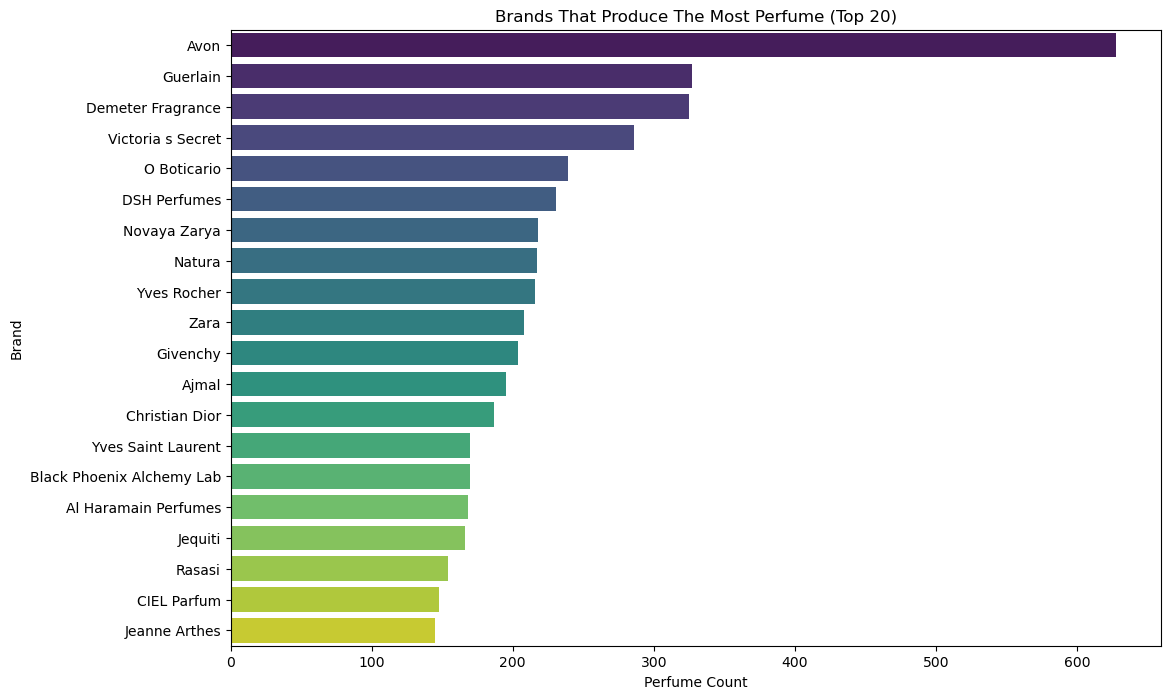

In [9]:
# Get the top 20 most frequent brands
top_brands = df['brand'].value_counts().head(20)

# Plot the top 20 brands
plt.figure(figsize=(12, 8))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('Brands That Produce The Most Perfume (Top 20)')
plt.xlabel('Perfume Count')
plt.ylabel('Brand')
plt.show()

### What are the least prevalent brands?

* The below brands only released 1 perfume ever. I've personally never heard of any of these names!

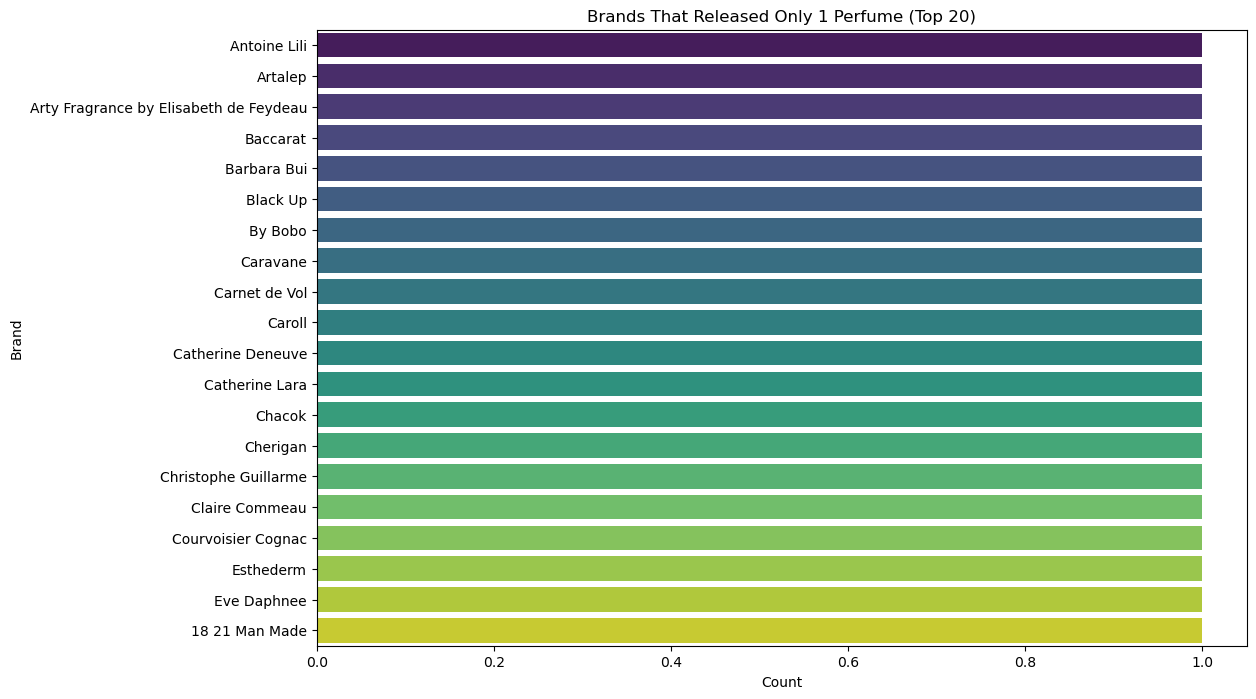

In [10]:
# Get the counts of each unique brand
brand_counts = df['brand'].value_counts()

# Get the least prevalent brands
least_prevalent_brands = brand_counts.tail(20)

# Plot the least prevalent brands
plt.figure(figsize=(12, 8))
sns.barplot(x=least_prevalent_brands.values, y=least_prevalent_brands.index, palette='viridis')
plt.title('Brands That Released Only 1 Perfume (Top 20)')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

### What are perfume notes? 
* Notes are generally intended for and provided to the consumer to give them some notion of what the composition is intended to "represent".
* Notes are often contrived, since many aroma chemicals may be needed to be combined to achieve the resultant "singular" representation of a note, such as rose.

### What are the Top 10 most prevalent singular notes?

* I'm not surprised to see that rose is the most common note used! However, I was expecting vanilla to be more prevalent!

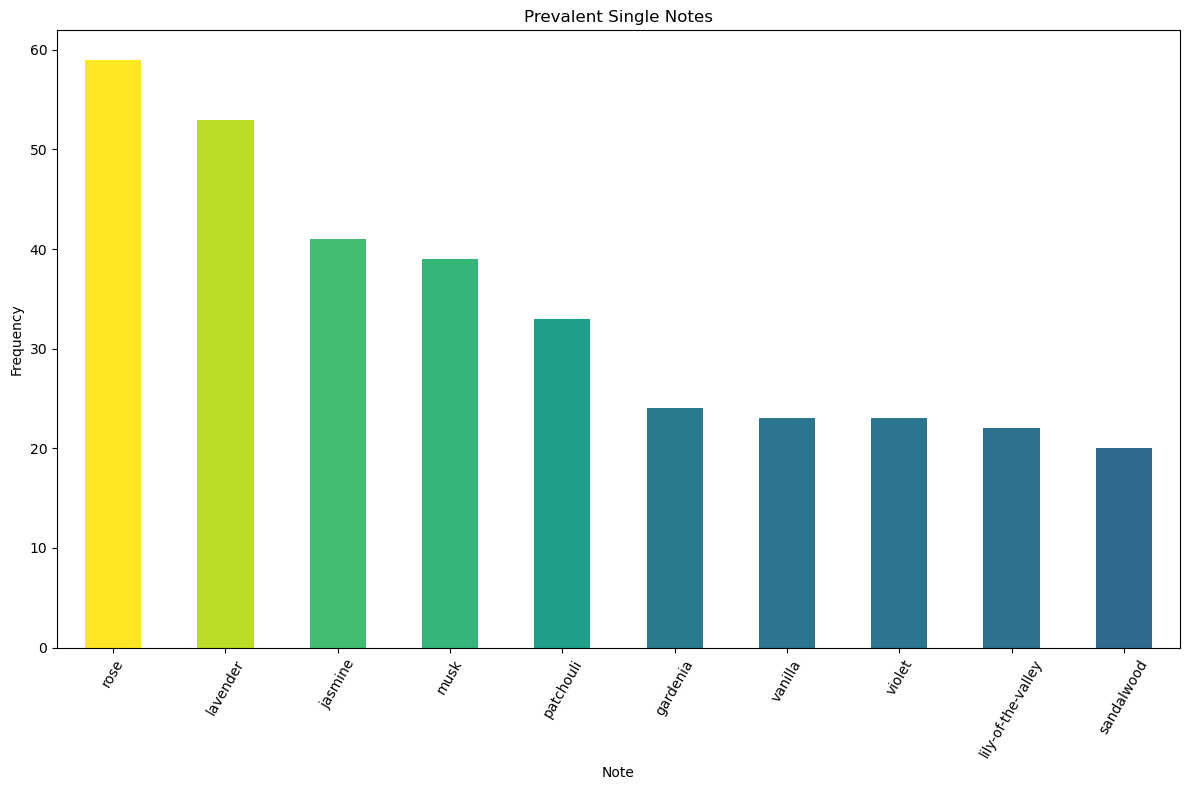

<Figure size 640x480 with 0 Axes>

In [11]:
# Filter the DataFrame to include only perfumes with single-word notes
single_word_notes = df[df['notes'].str.count(' ') == 0]['notes']

# top 15 Single notes
top_single_word_notes = single_word_notes.value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 8))  
top_single_word_notes.plot(kind='bar', color=plt.cm.viridis(top_single_word_notes.values / max(top_single_word_notes.values)))
plt.title('Prevalent Single Notes')
plt.xlabel('Note')
plt.ylabel('Frequency')
plt.xticks(rotation=60)  
plt.tight_layout()  
plt.show()

# Save the plot as an image
plt.savefig('Images/prevalent_single_notes.jpg')

### What two-note combinations are most common? (Top 10)

* Rose and sandalwood are the two most commonly combined notes! Notice that jasmine and musk are also popular, each appearing three times within different combos!

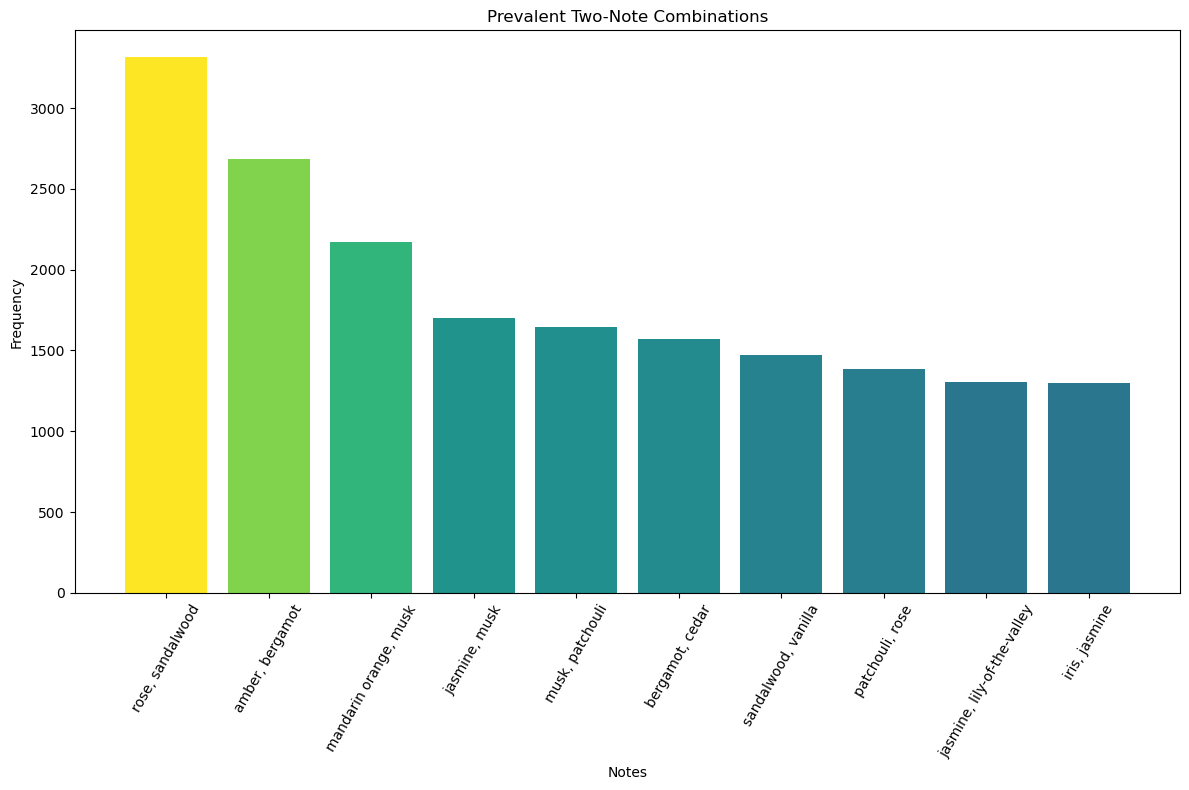

In [18]:
from collections import Counter
import numpy as np

# Create a list to store pairs of adjacent words in each note
pairs = []

# Iterate through each note and extract pairs of adjacent words
for note in df['notes']:
    note_list = note.split(', ')
    sorted_note_list = sorted(note_list)  # Sort the list alphabetically
    for i in range(len(sorted_note_list) - 1):
        pairs.append((sorted_note_list[i], sorted_note_list[i + 1]))

# Count the frequency of each pair of adjacent words
pair_counts = Counter(pairs)

# Get the top 15 pairs of adjacent words
top_pairs = pair_counts.most_common(10)

# Extract the pair combinations and their frequencies
pair_combinations = [pair[0][0] + ', ' + pair[0][1] for pair in top_pairs]
pair_frequencies = [pair[1] for pair in top_pairs]

# Plotting
plt.figure(figsize=(12, 8))
plt.bar(pair_combinations, pair_frequencies, color=plt.cm.viridis(np.array(pair_frequencies) / max(pair_frequencies)))
plt.title('Prevalent Two-Note Combinations')
plt.xlabel('Notes')
plt.ylabel('Frequency')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### What 3-note combinations are most common? (Top 10)

* The most prevalent combination of three notes was: jasmine + musk + sandalwood
* musk is in 8 out of ten of the combos!
* sandalwood and jasmine also appear in 6 out of 10 combos!

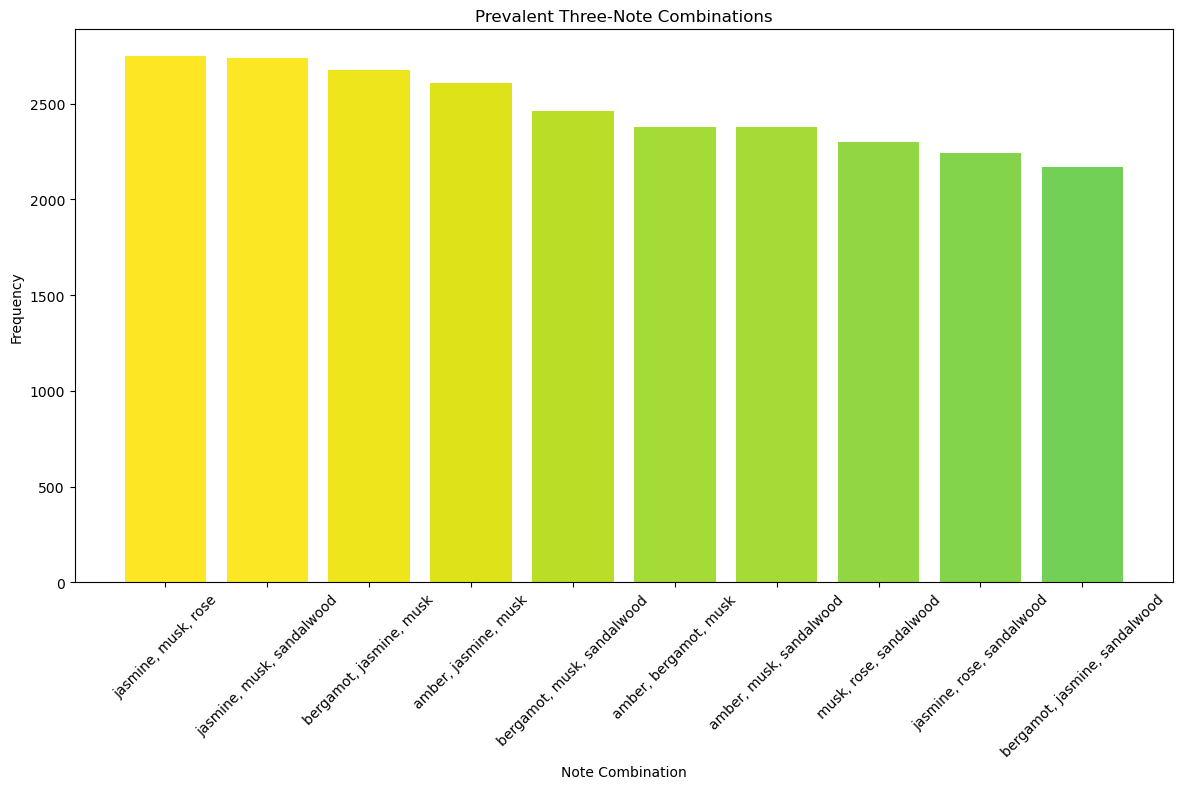

In [19]:
# Create a list to store triplets of adjacent words in each note
triplets = []

# Iterate through each note and extract triplets of adjacent words
for note in df['notes']:
    note_list = note.split(', ')
    sorted_note_list = sorted(note_list)  # Sort the list alphabetically
    for triplet in itertools.combinations(sorted_note_list, 3):  
        sorted_triplet = tuple(sorted(triplet))  
        triplets.append(sorted_triplet)

# Count the frequency of each triplet of adjacent words
triplet_counts = Counter(triplets)

# Get the top 15 triplets of adjacent words
top_triplets = triplet_counts.most_common(10) 

# Extract the triplet combinations and their frequencies
triplet_combinations = [', '.join(triplet) for triplet, _ in top_triplets]
triplet_frequencies = [count for _, count in top_triplets]

# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plt.bar(triplet_combinations, triplet_frequencies, color=plt.cm.viridis(np.array(triplet_frequencies) / max(triplet_frequencies)))
plt.title('Prevalent Three-Note Combinations')
plt.xlabel('Note Combination')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.subplots_adjust(bottom=0.3)  # Adjust the bottom margin
plt.tight_layout()
plt.show()

### How many notes does each perfume contain in this dataset?
* The histogram and boxplot below show that most perfumes contain somewhere between 5 to 12 notes.
* The outliers start occuring at around 20+ notes

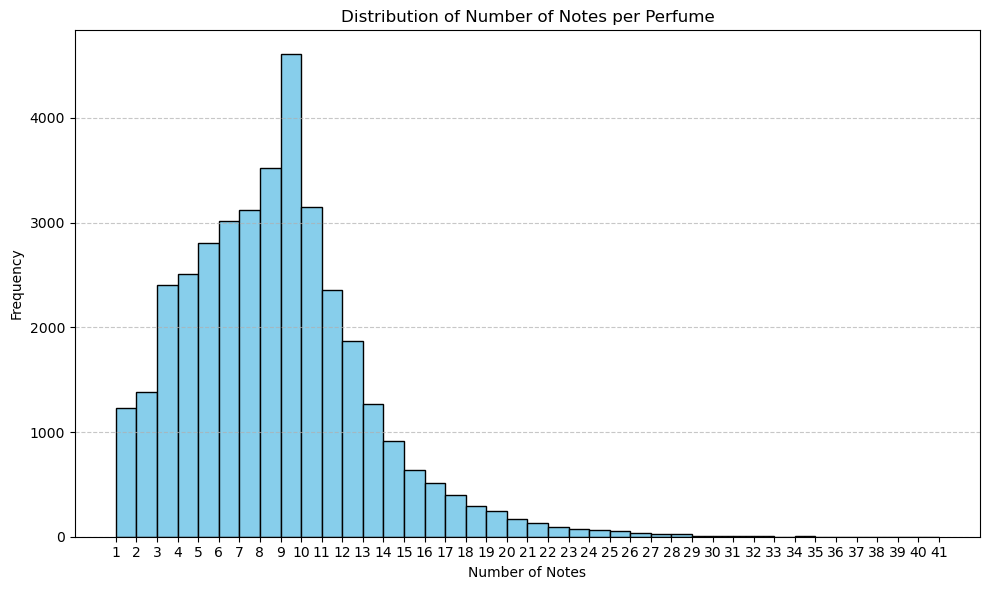

In [20]:
# Count the number of notes for each perfume
note_counts_per_perfume = df['notes'].str.split(', ').apply(len)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(note_counts_per_perfume, bins=range(1, note_counts_per_perfume.max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Notes per Perfume')
plt.xlabel('Number of Notes')
plt.ylabel('Frequency')
plt.xticks(range(1, note_counts_per_perfume.max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### The boxplot below allows us the better visualize the outliers.

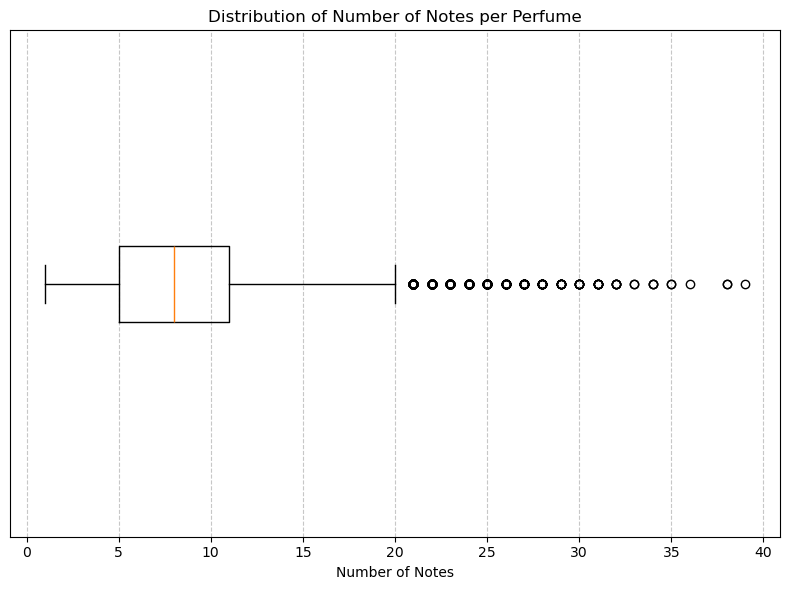

In [66]:
# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(note_counts_per_perfume, vert=False)
plt.title('Distribution of Number of Notes per Perfume')
plt.xlabel('Number of Notes')
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### So, which perfume has the MOST notes in the entire dataset? 

* It's called 'Mata Hari' and contains 41 unique notes!

In [21]:
# Count the number of notes for each perfume
perfume_note_counts = df['notes'].str.split(', ').apply(len)

# Find the index of the perfume with the most notes
max_notes_index = perfume_note_counts.idxmax()

# Get the name of the perfume with the most notes
perfume_with_most_notes = df.loc[max_notes_index, 'perfume']

# Print the result
print(f"The perfume with the most notes is '{perfume_with_most_notes}' with {perfume_note_counts[max_notes_index]} notes.")

The perfume with the most notes is 'Mata Hari' with 41 notes.


### What are the rare or unusual notes? (I am defining this as notes that only occur once)
* The wierdest in my opinion: jeans, satin, cork, brown scotch tape, surf wax, bbq, and western skunk cabbage! 

In [22]:
# Flatten the list of notes
all_notes = [note.strip() for sublist in df['notes'].str.split(',') for note in sublist]

# Count the frequency of each note
note_counts = Counter(all_notes)

# Sort notes by frequency in ascending order
sorted_notes = sorted(note_counts.items(), key=lambda x: x[1])

# Print the rare or unusual notes
print("Rare or Unusual Notes:")
for note, count in sorted_notes:
    if count <= 1:  # Adjust the threshold as needed
        print(f"{note}: {count} occurrence")

Rare or Unusual Notes:
south african sage: 1 occurrence
turkish coffee beans: 1 occurrence
alumroot: 1 occurrence
black gardenia: 1 occurrence
borneol: 1 occurrence
eau de vie: 1 occurrence
himalayan geranium: 1 occurrence
moroccan mimosa: 1 occurrence
chinese apricot: 1 occurrence
belambra tree: 1 occurrence
rose juliette greco: 1 occurrence
californian fig: 1 occurrence
wisteria petals: 1 occurrence
kyoto rose petals: 1 occurrence
juicy apricot: 1 occurrence
mai tai cocktail: 1 occurrence
red vanill-orchid: 1 occurrence
moroccan and indian jasmine: 1 occurrence
blueberry leaf: 1 occurrence
japanese pink lotus: 1 occurrence
chinese pink peony: 1 occurrence
white camelia: 1 occurrence
diamond orchid: 1 occurrence
water pepper: 1 occurrence
beech: 1 occurrence
hibiscus leaves: 1 occurrence
lupin: 1 occurrence
green orchid: 1 occurrence
japanese orchid: 1 occurrence
cocobolo: 1 occurrence
mangosteen blossom: 1 occurrence
saw palmetto: 1 occurrence
yohimbe: 1 occurrence
ginkgo: 1 occurren

### Has perfume production increased over the years?

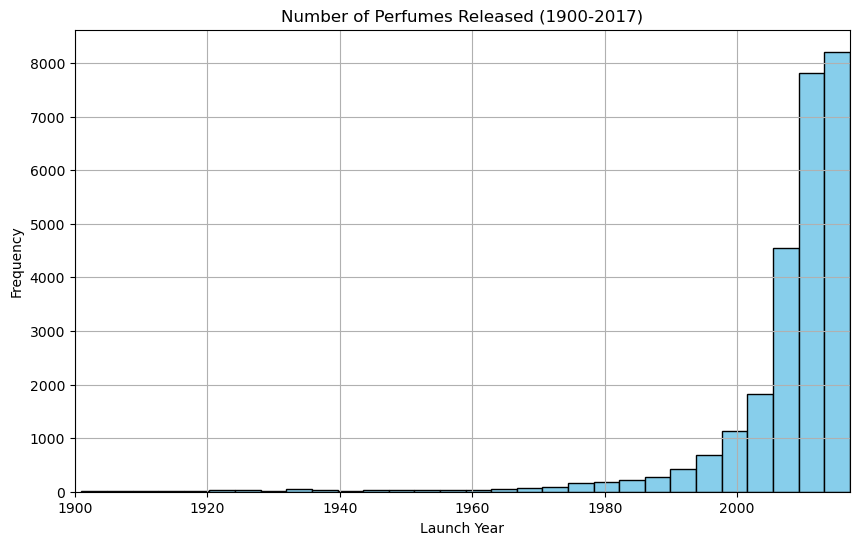

In [30]:
import matplotlib.pyplot as plt

# Filter out launch years equal to zero and within the desired range
valid_launch_years = df[(df['launch_year'] > 1900) & (df['launch_year'] <= 2017)]['launch_year']

# Create a histogram with adjusted x-axis limits
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(valid_launch_years, bins=30, color='skyblue', edgecolor='black')
plt.title('Number of Perfumes Released (1900-2017)')
plt.xlabel('Launch Year')
plt.ylabel('Frequency')
plt.xlim(1900, 2017)  # Adjust the x-axis limits to visualize the desired range
plt.grid(True)
plt.show()


### Fragrance Accords
* What's the difference between an accord and a note? 
* An accord represents different scent families, i.e. floral, sweet, fruity, tropical, etc.
* An accord also represents a facet or characteristic of a scent.

### How many fragrance accords present in this dataset?
* Answer: 80

In [35]:
# Split the 'main_accords' column by comma and create a list of all accords
all_accords = df['main_accords'].str.split(', ').tolist()

# Flatten the list of lists into a single list
flat_accords = [accord for sublist in all_accords for accord in sublist]

# Get unique accords
unique_accords = set(flat_accords)

# Count the total number of unique fragrance accords
total_accords = len(unique_accords)

# Print the total number of accords
print("Total number of fragrance accords:", total_accords)

Total number of fragrance accords: 80


### What are the 80 unique accords?

In [31]:
# Collect unique fragrance accords from the 'main_accords' column
fragrance_accords = df['main_accords'].str.split(', ', expand=True).stack().unique()

# Print the list of all fragrance accords
print("All fragrance accords present in the dataset:")
print(fragrance_accords)

All fragrance accords present in the dataset:
['wine' 'vanilla' 'sweet' 'woody' 'aromatic' 'musky' 'balsamic' 'powdery'
 'warm spicy' 'amber' 'yellow floral' 'white floral' 'oud' 'fresh spicy'
 'green' 'tuberose' 'animalic' 'fruity' 'earthy' 'citrus' 'narcotic'
 'soapy' 'patchouli' 'herbal' 'rose' 'floral' 'ozonic' 'aquatic' 'cacao'
 'fresh' 'aldehydic' 'tropical' 'leather' 'smoky' 'coca-cola' 'gourmand'
 'honey' 'sour' 'marine' 'terpenic' 'soft spicy' 'tobacco' 'coconut'
 'salty' 'cinnamon' 'rum' 'caramel' 'milky' 'watery' 'nutty' 'bitter'
 'almond' 'savory' 'whiskey' 'metallic' 'beeswax' 'sand' 'coffee'
 'camphor' 'clay' 'lactonic' 'mossy' 'cherry' 'conifer' 'alcohol' 'vinil'
 'vodka' 'asphault' 'caramela' 'industrial glue' 'martini' 'anis'
 'plastic' 'white wine' 'tennis ball' 'bbq' 'wet plaster' 'champagne'
 'foresty' 'cognac']


### Which accords are the most prevalent? (Top 10)
* woody, citrus, floral, aromatic, sweet, fresh spicy, white floral, fruity, green, powdery

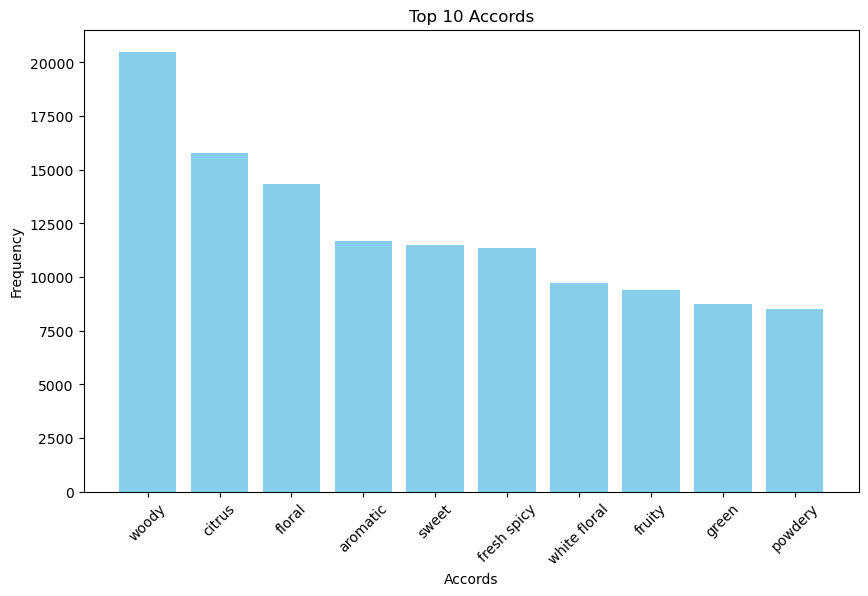

<Figure size 640x480 with 0 Axes>

In [13]:
# Split the 'main_accords' column by comma and create a list of all accords
all_accords = df['main_accords'].str.split(', ').tolist()

# Flatten the list of lists into a single list
flat_accords = [accord for sublist in all_accords for accord in sublist]

# Count the occurrences of each accord
accord_counts = Counter(flat_accords)

# Get the top 10 most frequent accords
top_accords = dict(accord_counts.most_common(10))

# Plot the histogram for top 10 most used accords
plt.figure(figsize=(10, 6))
plt.bar(top_accords.keys(), top_accords.values(), color='skyblue')
plt.title('Top 10 Accords')
plt.xlabel('Accords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Save the plot as an image
plt.savefig('top_accords.png')

### What accords are the least prevalent? 

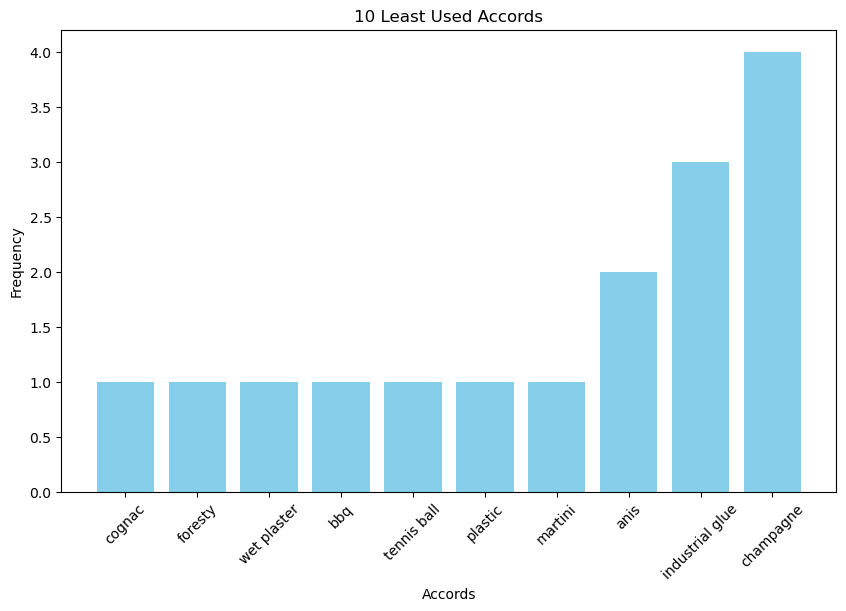

<Figure size 640x480 with 0 Axes>

In [14]:
# Get the 10 least used accords
least_used_accords = accord_counts.most_common()[:-11:-1]

# Extract accords and their corresponding frequencies
accords, frequencies = zip(*least_used_accords)

# Plot the histogram for the 10 least used accords
plt.figure(figsize=(10, 6))
plt.bar(accords, frequencies, color='skyblue')
plt.title('10 Least Used Accords')
plt.xlabel('Accords')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

# Save the plot as an image
plt.savefig('least_used_accords.png')